# density-缩减版，可以一键计算-2022年7月

要点梳理：
- 剔除云层遮挡和数据缺失的情况

拖山的经度和纬度是(120.14,31.406)，兰山嘴的经度和纬度是(119.89,31.212)。我需要分析这2个点位逐日的叶绿素a浓度，请你修改下面的代码。如果受到云层影响导致数据缺失，请你用NAN代替。

创新点在于，将云层覆盖的区域设置为999999，这样在后续处理中可以很容易地识别出这些区域。

https://engine-aiearth.aliyun.com/docs/page/api?d=07f36f#heading-22

https://engine-aiearth.aliyun.com/?spm=a2cvf.28031243.0.0.5dc743d42pbV5o#/utility/auth-token

In [1]:
import aie

aie.Authenticate(token='8f04bf5ebc3b343fcfc4373fd0dd4a33')
aie.Initialize()

计算资源初始化中，请等待...
计算资源初始化完成.


In [2]:
import geopandas as gpd

In [3]:
# 读取shp文件
shapefile_path = '/root/Download/Modis-algae-aliyun/local-data/taihu.shp'
gdf = gpd.read_file(shapefile_path)

# 假设shp文件中只有一个几何对象，取第一个
geometry = gdf.geometry.iloc[0]
print(geometry)
# 输出((119.95082568376117 31.341888097180494, 119.98639104240964 31.388554715968827, ...

# 将geopandas的geometry对象转换为ee.Geometry
coords = list(geometry.exterior.coords)
flattened_coords = [coord for point in coords for coord in point]
taihu = aie.Geometry.Polygon(flattened_coords)
# 构造Polygon。输入参数支持GeoJSON 'Polygon'类型格式的坐标点集，
# 同时也支持包含偶数个数字的一维List，例如aie.Geometry.Polygon([aLng, aLat, bLng, bLat, ...])。
# 需注意，输入的坐标点将以EPSG:4326坐标系进行解析。

# 打印ee.Geometry对象以验证
print(taihu)

POLYGON ((119.95082568376117 31.341888097180494, 119.98639104240964 31.388554715968827, 120.00611934273043 31.40820067954559, 120.0213482061359 31.420557311454473, 120.02780893606551 31.42562749019076, 120.03023170978913 31.42966374717613, 120.0274051404449 31.43596389857637, 120.02025218945138 31.447873965243872, 120.00888822698595 31.45166321445573, 120.01067646473432 31.455403102339847, 120.01448368058568 31.46224277412878, 120.01806015608244 31.467556706624215, 120.02342486932757 31.473017934057427, 120.02827041677476 31.47729813281918, 120.02902032292732 31.479561147303205, 120.03525031250228 31.481725718642263, 120.03871141782174 31.48452974796941, 120.04223020822982 31.48275879185581, 120.04678733023371 31.479659537995836, 120.05734370145801 31.476461787529658, 120.06017027080222 31.47651098451827, 120.06380443138762 31.471541958062947, 120.06276609979179 31.468442332717288, 120.06345832085567 31.46578542930369, 120.06703479635243 31.4656870240255, 120.07078432711515 31.46052060

# 计算完整的7月份

你这个逻辑还是有问题，请你用伪代码的方式，提供一个代码的逻辑框架，please think by chain-of-thought：


我需要你同步输出modis反演的藻密度和lanshanzui.csv'中的藻密度，使得二者之间的差距尽可能小。由于lanshanzui.csv'中的藻密度一天会产生6个值，因此lanshanzui.csv'中的藻密度将采用置信区间的形式，modis反演的藻密度将与“lanshanzui.csv'中的藻密度将采用置信区间”进行比较

请你分析并修改这段代码，我的顾虑是："""这段代码好像是通过2022年7月逐日的计算值逐步优化参数，应该根据遥感影像的sample的完整的2022年7月的结果一起计算？输出一个最终的优化参数？"""

需要你注意如下2种情况将不作为参数优化的计算依据：
- MODIS遥感影像中藻密度为9999.0，也就是云层遮挡的情况
- df['density']中数据缺失的情况。

```
# 步骤1: 数据准备
读取 'lanshanzui.csv' 文件
处理数据:
    转换日期格式
    移除密度为NaN的数据
    按日期分组计算每日统计数据(平均值、标准差、样本数)
    计算每日95%置信区间

读取2022年7月的所有MODIS影像数据

# 步骤2: 定义优化函数
def 优化函数(参数, NDCI值列表, 目标密度上限列表, 目标密度下限列表):
    预测密度 = 计算预测密度(参数, NDCI值列表)
    误差 = sum([max(0, 下限 - 密度, 密度 - 上限)**2 
                for 密度, 下限, 上限 in zip(预测密度, 目标密度下限列表, 目标密度上限列表)])
    return 误差

# 步骤3: 收集所有有效数据
有效NDCI值列表 = []
有效目标密度上限列表 = []
有效目标密度下限列表 = []
for 每一天 in 2022年7月:
    MODIS影像 = 获取当天MODIS影像()
    NDCI值数组 = 计算NDCI(MODIS影像)
    目标密度区间 = 获取lanshanzui当天密度置信区间()
    
    if 目标密度区间不是NaN:
        有效NDCI = [值 for 值 in NDCI值数组 if 值 != 9999.0]
        if len(有效NDCI) > 0:
            有效NDCI值列表.extend(有效NDCI)
            有效目标密度上限列表.extend([目标密度区间.上限] * len(有效NDCI))
            有效目标密度下限列表.extend([目标密度区间.下限] * len(有效NDCI))


# 步骤4: 优化参数
初始参数 = [1000, 0, 0]
优化结果 = 最小化(优化函数, 初始参数, 参数=(有效NDCI值列表, 有效目标密度列表))
最优参数 = 优化结果.x

# 步骤5: 应用优化后的参数
for 每一天 in 2022年7月:
    MODIS影像 = 获取当天MODIS影像()
    处理后的影像 = 应用参数计算藻密度(MODIS影像, 最优参数)
    输出结果(处理后的影像, 当天日期)

# 步骤6: 输出最终结果
输出最优参数
输出整月的藻密度估算结果


```

```
<代码2>的逻辑应该继承自<代码1>，请你分析<代码1>中是否有关键性的逻辑被<代码2>遗漏

<代码1>
import datetime
import csv
import aie  # 假设这是您的地球观测数据处理库

start_date = datetime.date(2022, 7, 1)
end_date = datetime.date(2022, 7, 31)
delta = datetime.timedelta(days=1)

# 计算湖泊总面积
lake_area = taihu.area()

# 创建CSV文件并写入表头
with open('taihu_data.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['日期', '站点', '藻密度'])

while start_date <= end_date:
    date_str = start_date.strftime("%Y_%m_%d")
    img = aie.Image(f'MODIS_MOD09GA_061_{date_str}')\
             .select(['sur_refl_b01', 'sur_refl_b04', 'sur_refl_b03','state_1km'])
    
    def mask_clouds(image):
        qa = image.select('state_1km')
        cloud_bit_mask = 1 << 10
        mask = qa.bitwiseAnd(aie.Image.constant(cloud_bit_mask))
        return mask
    
    def calculate_algae_density(image, cloud_mask):
        b01 = image.select('sur_refl_b01').toFloat()
        b03 = image.select('sur_refl_b03').toFloat()
        b04 = image.select('sur_refl_b04').toFloat()
        
        # 修改为计算藻密度的模型
        # 这里使用一个简化的模型，实际应用中可能需要更复杂的算法
        ndci = b04.subtract(b03).divide(b04.add(b03))
        algae_density = ndci.multiply(aie.Image.constant(100)).add(aie.Image.constant(50)).rename(['AlgaeDensity'])
        
        # 将云层覆盖区域的藻密度值设置为极大值（例如9999）
        algae_density_masked = algae_density.where(cloud_mask.Not(), aie.Image.constant(9999))
        
        return image.addBands(algae_density_masked).select(['AlgaeDensity']).toFloat()
    
    # 应用云掩膜和计算藻密度
    cloud_mask = mask_clouds(img)
    processed_img = calculate_algae_density(img, cloud_mask)
    processed_img = processed_img.clip(taihu)
    
    # 指定采样区域，并在100分辨率下获取20个样本点，同时保留Geometry
    roi = aie.Geometry.BBox(119.89, 31.212, 119.90, 31.222)
    fcPointSamp = processed_img.sample(roi, 100, 1, 0, True)
    
    print(f"日期: {date_str}")
    print("藻密度:")
    print(fcPointSamp.aggregate_array('AlgaeDensity').getInfo())
    print("---")

    start_date += delta
</代码1>


<代码2>
import datetime
import csv
import aie
import pandas as pd
import numpy as np
import chardet
from datetime import timedelta
from scipy.optimize import minimize

# 步骤1: 数据准备
csv_file = '/root/Download/Modis-algae-aliyun/aie-taihu/00-lanshanzui.csv'

# 检测文件编码
with open(csv_file, 'rb') as f:
    result = chardet.detect(f.read())

# 使用探测到的编码读取文件
df = pd.read_csv(csv_file, encoding=result['encoding'])

# 将日期列转换为日期时间格式
df['date'] = pd.to_datetime(df['date'])

# 设置日期为索引
df.set_index('date', inplace=True)

# 移除密度为NaN的数据
df = df.dropna(subset=['density'])

# 按日期分组并计算每日的统计数据
daily_stats = df['density'].resample('D').agg(['mean', 'std', 'count'])

# 计算95%置信区间
confidence_interval = 1.96 * daily_stats['std'] / np.sqrt(daily_stats['count'])

# 计算置信区间的上下限
daily_stats['lower_ci'] = daily_stats['mean'] - confidence_interval
daily_stats['upper_ci'] = daily_stats['mean'] + confidence_interval

# 步骤2: 定义优化函数
def optimize_function(params, ndci_list, upper_density_list, lower_density_list):
    predicted_density = params[0] * np.array(ndci_list) + params[1]
    error = sum([max(0, lower - density, density - upper)**2 
                 for density, lower, upper in zip(predicted_density, lower_density_list, upper_density_list)])
    return error

# 步骤3: 收集所有有效数据
valid_ndci_list = []
valid_upper_density_list = []
valid_lower_density_list = []
start_date = datetime.date(2022, 7, 1)
end_date = datetime.date(2022, 7, 31)
delta = datetime.timedelta(days=1)
roi = aie.Geometry.BBox(119.89, 31.212, 119.90, 31.222)

def mask_clouds(image):
    qa = image.select('state_1km')
    cloud_bit_mask = 1 << 10
    mask = qa.bitwiseAnd(aie.Image.constant(cloud_bit_mask))
    return mask

while start_date <= end_date:
    date_str = start_date.strftime("%Y_%m_%d")
    img = aie.Image(f'MODIS_MOD09GA_061_{date_str}')\
             .select(['sur_refl_b01', 'sur_refl_b04', 'sur_refl_b03','state_1km'])
    
    cloud_mask = mask_clouds(img)
    ndci = img.normalizedDifference(['sur_refl_b04', 'sur_refl_b03'])
    ndci_masked = ndci.where(cloud_mask.Not(), aie.Image.constant(9999))
    
    current_date = pd.to_datetime(start_date)
    if current_date in daily_stats.index:
        lower_ci = daily_stats.loc[current_date, 'lower_ci']
        upper_ci = daily_stats.loc[current_date, 'upper_ci']
        
        ndci_values = ndci_masked.sample(roi, 100, 1, 0, True).aggregate_array('nd').getInfo()
        
        valid_ndci = [value for value in ndci_values if value != 9999.0]
        if len(valid_ndci) > 0:
            valid_ndci_list.extend(valid_ndci)
            valid_upper_density_list.extend([upper_ci] * len(valid_ndci))
            valid_lower_density_list.extend([lower_ci] * len(valid_ndci))
    
    start_date += delta

# 步骤4: 优化参数
initial_params = [1000, 0, 0]
optimization_result = minimize(optimize_function, initial_params, args=(valid_ndci_list, valid_upper_density_list, valid_lower_density_list))
optimal_params = optimization_result.x

# 步骤5: 应用优化后的参数并绘制结果
import matplotlib.pyplot as plt

start_date = datetime.date(2022, 7, 1)
dates = []
estimated_densities = []
lower_ci_values = []
upper_ci_values = []

while start_date <= end_date:
    date_str = start_date.strftime("%Y_%m_%d")
    img = aie.Image(f'MODIS_MOD09GA_061_{date_str}')\
             .select(['sur_refl_b01', 'sur_refl_b04', 'sur_refl_b03','state_1km'])
    
    ndci = img.normalizedDifference(['sur_refl_b04', 'sur_refl_b03'])
    algae_density = ndci.multiply(aie.Image.constant(optimal_params[0])).add(aie.Image.constant(optimal_params[1])).rename(['AlgaeDensity'])
    
    # 计算估算结果
    estimated_density = algae_density.sample(roi, 100, 1, 0, True).aggregate_array('AlgaeDensity').getInfo()
    
    # 获取置信区间
    current_date = pd.to_datetime(start_date)
    if current_date in daily_stats.index:
        lower_ci = daily_stats.loc[current_date, 'lower_ci']
        upper_ci = daily_stats.loc[current_date, 'upper_ci']
    else:
        lower_ci = upper_ci = None
    
    # 存储结果
    dates.append(start_date)
    estimated_densities.append(estimated_density)
    lower_ci_values.append(lower_ci)
    upper_ci_values.append(upper_ci)
    
    print(f"日期: {date_str}")
    print(f"藻密度估算结果: {estimated_density}")
    print(f"置信区间: [{lower_ci}, {upper_ci}]")
    print("---")
    
    start_date += delta

# 绘制结果
plt.figure(figsize=(12, 6))
plt.plot(dates, estimated_densities, label='估算结果', color='blue')
plt.fill_between(dates, lower_ci_values, upper_ci_values, alpha=0.2, color='blue', label='95%置信区间')
plt.xlabel('日期')
plt.ylabel('藻密度')
plt.title('2022年7月太湖藻密度估算结果')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 步骤6: 输出最终结果
print("最优参数:", optimal_params)
print("整月藻密度估算已完成")

</代码2>
```

优化结果:
参数: [37931342.3459418  24888553.10348693 10890987.32887547]
函数值: 2686513460102149.0
迭代次数: 375
函数评估次数: 754
优化是否成功: True
优化状态: Optimization terminated successfully.
过滤前像素数量: 1
过滤后像素数量: 1
日期: 2022_07_01
藻密度估算结果: 25780022.0
置信区间: [15381023.755087659, 21552309.578245677]
---
过滤前像素数量: 1
过滤后像素数量: 0
日期: 2022_07_02
藻密度估算结果: 数据不可用
置信区间: [11330271.824073968, 16669728.175926032]
---
过滤前像素数量: 1
过滤后像素数量: 1
日期: 2022_07_03
藻密度估算结果: 26190790.0
置信区间: [11649386.113057153, 14983947.220276179]
---
过滤前像素数量: 1
过滤后像素数量: 1
日期: 2022_07_04
藻密度估算结果: 30448880.0
置信区间: [15691375.81649267, 26008624.18350733]
---
过滤前像素数量: 1
过滤后像素数量: 1
日期: 2022_07_05
藻密度估算结果: 26775868.0
置信区间: [12101820.94093789, 19731512.392395444]
---
过滤前像素数量: 1
过滤后像素数量: 0
日期: 2022_07_06
藻密度估算结果: 数据不可用
置信区间: [12971030.604999147, 27053512.72833419]
---
过滤前像素数量: 1
过滤后像素数量: 0
日期: 2022_07_07
藻密度估算结果: 数据不可用
置信区间: [7966451.605437659, 47594988.39456234]
---
过滤前像素数量: 1
过滤后像素数量: 1
日期: 2022_07_08
藻密度估算结果: 27355590.0
置信区间: [19055410.563993074, 28277922.769

/tmp/ipykernel_23319/4112114913.py:163: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_23319/4112114913.py:163: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_23319/4112114913.py:163: UserWarning: Glyph 34299 (\N{CJK UNIFIED IDEOGRAPH-85FB}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_23319/4112114913.py:163: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_23319/4112114913.py:163: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_23319/4112114913.py:163: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_23319/4112114913.py:163: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.

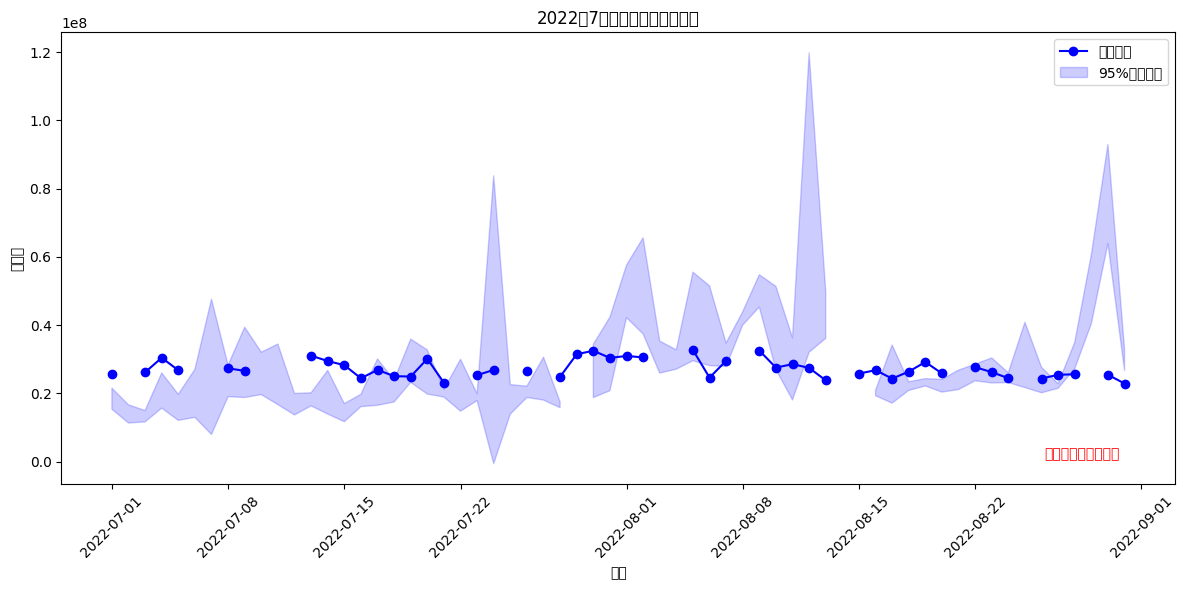

最优参数: [37931342.3459418  24888553.10348693 10890987.32887547]
整月藻密度估算已完成


In [5]:
import datetime
import csv
import aie
import pandas as pd
import numpy as np
import chardet
from datetime import timedelta
from scipy.optimize import minimize

# 步骤1: 数据准备
csv_file = '/root/Download/Modis-algae-aliyun/aie-taihu/00-lanshanzui.csv'

# 检测文件编码
with open(csv_file, 'rb') as f:
    result = chardet.detect(f.read())

# 使用探测到的编码读取文件
df = pd.read_csv(csv_file, encoding=result['encoding'])

# 将日期列转换为日期时间格式
df['date'] = pd.to_datetime(df['date'])

# 设置日期为索引
df.set_index('date', inplace=True)

# 移除密度为NaN的数据
df = df.dropna(subset=['density'])

# 按日期分组并计算每日的统计数据
daily_stats = df['density'].resample('D').agg(['mean', 'std', 'count'])

# 计算95%置信区间
confidence_interval = 1.96 * daily_stats['std'] / np.sqrt(daily_stats['count'])

# 计算置信区间的上下限
daily_stats['lower_ci'] = daily_stats['mean'] - confidence_interval
daily_stats['upper_ci'] = daily_stats['mean'] + confidence_interval

# 步骤2: 定义优化函数
def optimize_function(params, ndci_list, upper_density_list, lower_density_list):
    predicted_density = params[0] * np.array(ndci_list) + params[1]
    error = sum([max(0, lower - density, density - upper)**2 
                 for density, lower, upper in zip(predicted_density, lower_density_list, upper_density_list)])
    return error

# 步骤3: 收集所有有效数据
valid_ndci_list = []
valid_upper_density_list = []
valid_lower_density_list = []
start_date = datetime.date(2022, 7, 1)
end_date = datetime.date(2022, 8, 31)
delta = datetime.timedelta(days=1)
roi = aie.Geometry.BBox(119.89, 31.212, 119.90, 31.222)

def mask_clouds(image):
    qa = image.select('state_1km')
    cloud_bit_mask = 1 << 10
    mask = qa.bitwiseAnd(aie.Image.constant(cloud_bit_mask))
    return mask

while start_date <= end_date:
    date_str = start_date.strftime("%Y_%m_%d")
    img = aie.Image(f'MODIS_MOD09GA_061_{date_str}')\
             .select(['sur_refl_b01', 'sur_refl_b04', 'sur_refl_b03','state_1km'])
    
    cloud_mask = mask_clouds(img)
    ndci = img.normalizedDifference(['sur_refl_b04', 'sur_refl_b03'])
    ndci_masked = ndci.where(cloud_mask.Not(), aie.Image.constant(9999))
    
    current_date = pd.to_datetime(start_date)
    if current_date in daily_stats.index:
        lower_ci = daily_stats.loc[current_date, 'lower_ci']
        upper_ci = daily_stats.loc[current_date, 'upper_ci']
        
        ndci_values = ndci_masked.sample(roi, 100, 1, 0, True).aggregate_array('nd').getInfo()
        
        valid_ndci = [value for value in ndci_values if value != 9999.0]
        if len(valid_ndci) > 0:
            valid_ndci_list.extend(valid_ndci)
            valid_upper_density_list.extend([upper_ci] * len(valid_ndci))
            valid_lower_density_list.extend([lower_ci] * len(valid_ndci))
    
    start_date += delta

# 步骤4: 优化参数
initial_params = [1000, 0, 0]
optimization_result = minimize(optimize_function, initial_params, args=(valid_ndci_list, valid_upper_density_list, valid_lower_density_list), method='Nelder-Mead', options={'maxiter': 10000, 'maxfev': 15000})
optimal_params = optimization_result.x

# 输出优化结果
print("优化结果:")
print(f"参数: {optimal_params}")
print(f"函数值: {optimization_result.fun}")
print(f"迭代次数: {optimization_result.nit}")
print(f"函数评估次数: {optimization_result.nfev}")
print(f"优化是否成功: {optimization_result.success}")
print(f"优化状态: {optimization_result.message}")

# 步骤5: 应用优化后的参数并绘制结果
import matplotlib.pyplot as plt
import numpy as np

start_date = datetime.date(2022, 7, 1)
dates = []
estimated_densities = []
lower_ci_values = []
upper_ci_values = []

while start_date <= end_date:
    date_str = start_date.strftime("%Y_%m_%d")
    img = aie.Image(f'MODIS_MOD09GA_061_{date_str}')\
             .select(['sur_refl_b01', 'sur_refl_b04', 'sur_refl_b03','state_1km'])
    
    cloud_mask = mask_clouds(img)
    ndci = img.normalizedDifference(['sur_refl_b04', 'sur_refl_b03'])
    ndci_masked = ndci.where(cloud_mask.Not(), aie.Image.constant(9999))
    algae_density = ndci_masked.multiply(aie.Image.constant(optimal_params[0])).add(aie.Image.constant(optimal_params[1])).rename(['AlgaeDensity'])
    
    # 计算估算结果
    estimated_density = algae_density.sample(roi, 100, 1, 0, True).aggregate_array('AlgaeDensity').getInfo()
    
    # 过滤掉云覆盖的像素
    cloud_threshold = 9999 * optimal_params[0] + optimal_params[1]
    valid_density = [d for d in estimated_density if d < cloud_threshold/10]
    

    
    # 输出过滤前后的像素数量，以便检查
    print(f"过滤前像素数量: {len(estimated_density)}")
    print(f"过滤后像素数量: {len(valid_density)}")
    
    # 获取置信区间
    current_date = pd.to_datetime(start_date)
    if current_date in daily_stats.index:
        lower_ci = daily_stats.loc[current_date, 'lower_ci']
        upper_ci = daily_stats.loc[current_date, 'upper_ci']
    else:
        lower_ci = upper_ci = None
    
    # 存储结果
    dates.append(start_date)
    estimated_densities.append(np.mean(valid_density) if valid_density else np.nan)
    lower_ci_values.append(lower_ci)
    upper_ci_values.append(upper_ci)
    
    print(f"日期: {date_str}")
    print(f"藻密度估算结果: {np.mean(valid_density) if valid_density else '数据不可用'}")
    print(f"置信区间: [{lower_ci}, {upper_ci}]")
    print("---")
    
    start_date += delta

# 绘制结果
plt.figure(figsize=(12, 6))
plt.plot(dates, estimated_densities, label='估算结果', color='blue', marker='o')
plt.fill_between(dates, lower_ci_values, upper_ci_values, alpha=0.2, color='blue', label='95%置信区间')

plt.xlabel('日期')
plt.ylabel('藻密度')
plt.title('2022年7月太湖藻密度估算结果')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# 添加云覆盖说明
plt.text(0.95, 0.05, '缺失数据表示云覆盖', transform=plt.gca().transAxes, 
         horizontalalignment='right', verticalalignment='bottom', color='red')

plt.show()

# 步骤6: 输出最终结果
print("最优参数:", optimal_params)
print("整月藻密度估算已完成")